In [ ]:
# Mount the Google Drive in a Google colab notebook
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)


Mounted at /content/gdrive


In [ ]:
# Import necessary libraries/Modules

import os
from PIL import Image
from IPython.display import display
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import numpy as np
import seaborn as sns
import pandas as pd
from skimage.io import imread
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras import regularizers
from sklearn.model_selection import train_test_split
from PIL import Image, UnidentifiedImageError
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from keras.applications.vgg19 import VGG19
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
from tensorflow.keras.applications import MobileNetV2, DenseNet121
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, GlobalAveragePooling2D, concatenate
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from keras.regularizers import l2
from keras.layers import Dropout


# Define the directories of training and test set images
train_dir = '/content/gdrive/MyDrive/BrainTumorDataset_New/Training'
test_dir = '/content/gdrive/MyDrive/BrainTumorDataset_New/Testing'

In [ ]:
# Count the number of images in each subdirectory
def count_images(directory):
    image_count = 0
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith(".jpg"):
                    image_count += 1

    return image_count

# Count the number of images in the training set
train_image_count = count_images(train_dir)
print(f"There are {train_image_count} images in the training set.")

# Count the number of images in the test set
test_image_count = count_images(test_dir)
print(f"There are {test_image_count} images in the test set.")

# Calculate the total number of images
total_image_count = train_image_count + test_image_count
print(f"There are a total of {total_image_count} images in the dataset.")


There are 5712 images in the training set.
There are 1311 images in the test set.
There are a total of 7023 images in the dataset.


In [ ]:
# Get the list of subdirectories (i.e., classes)
subdirs = os.listdir(train_dir)

# For each subdirectory, count the number of images
for subdir in subdirs:
    subdir_path = os.path.join(train_dir, subdir)
    if os.path.isdir(subdir_path):
        num_images = len(os.listdir(subdir_path))
        print(f'There are {num_images} images in the {subdir} directory.')



There are 1321 images in the glioma directory.
There are 1595 images in the notumor directory.
There are 1457 images in the pituitary directory.
There are 1339 images in the meningioma directory.


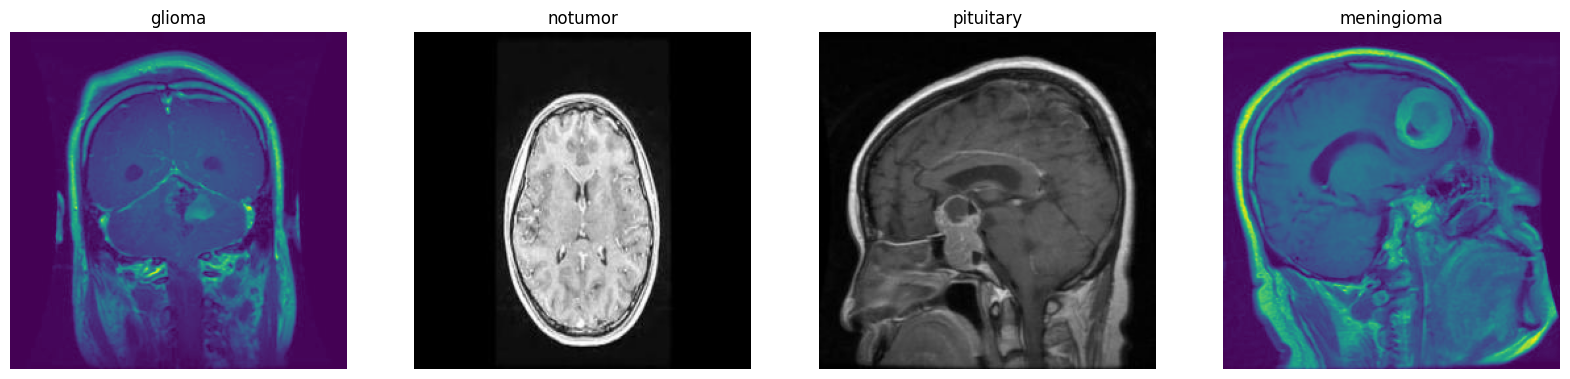

In [ ]:
# The below code shows the types of brain tumor
# Get the list of tumor types
tumor_types = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]

# Create a figure to display the images
fig = plt.figure(figsize=(20, 20))

# Loop over each tumor type
for i, tumor_type in enumerate(tumor_types):
    # Get the list of images for this tumor type
    image_files = os.listdir(os.path.join(train_dir, tumor_type))

    # Load the first image
    img = mpimg.imread(os.path.join(train_dir, tumor_type, image_files[0]))

    # Add a subplot for this image
    ax = fig.add_subplot(1, len(tumor_types), i+1)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(tumor_type)

# Show the figure
plt.show()


Displaying one image from each subdirectory in training set:
Displaying image from glioma folder:
The size of the image is: (256, 256)


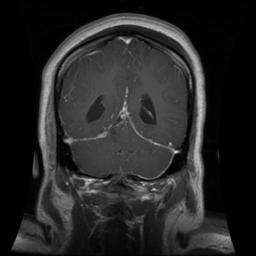

Displaying image from notumor folder:
The size of the image is: (256, 256)


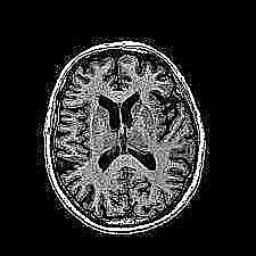

Displaying image from pituitary folder:
The size of the image is: (256, 256)


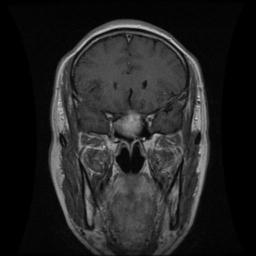

Displaying image from meningioma folder:
The size of the image is: (256, 256)


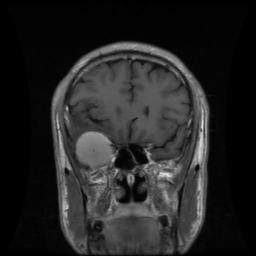

Displaying one image from each subdirectory in test set:
Displaying image from glioma folder:
The size of the image is: (256, 256)


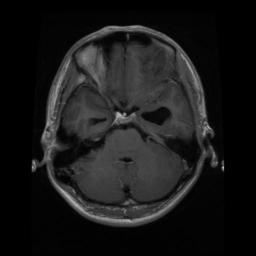

Displaying image from notumor folder:
The size of the image is: (256, 256)


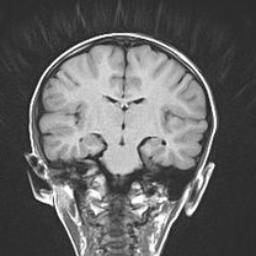

Displaying image from pituitary folder:
The size of the image is: (256, 256)


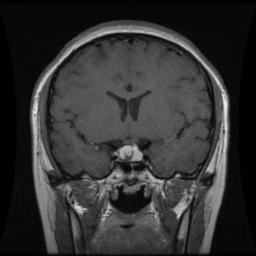

Displaying image from meningioma folder:
The size of the image is: (256, 256)


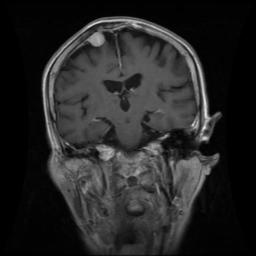

In [ ]:
# Displaying one image from each subdirectory in training set and Test set
# Function to display images
def display_images(directory):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith(".jpg"):
                    image_path = os.path.join(subdir_path, filename)
                    #print(image_path)
                    image = Image.open(image_path)
                    resized_img = image.resize((256,256), Image.BILINEAR)
                    resized_img.save(image_path)  # Save the resized image at the same location, replacing the original
                    #print(image_path)
                    print(f"Displaying image from {subdir} folder:")
                    print(f"The size of the image is: {resized_img.size}")
                    display(resized_img)
                    break

# Display training set images
print("Displaying one image from each subdirectory in training set:")
display_images(train_dir)

# Display test set images
print("Displaying one image from each subdirectory in test set:")
display_images(test_dir)


In [ ]:
# This code snippet loads the training and testing data into Pandas DataFrames (train_df and test_df)
# It shuffles the rows of the DataFrames using the shuffle function from the sklearn.utils module.
# This is to ensure that the data is not ordered by the labels and that the model will not learn any bias from the data distribution.
# Function to load image paths and labels into a DataFrame
def load_data(train_dir):
    image_paths = []
    labels = []

    for label in os.listdir(train_dir):
        label_path = os.path.join(train_dir, label)
        if os.path.isdir(label_path):
            for image in os.listdir(label_path):
                image_path = os.path.join(label_path, image)
                image_paths.append(image_path)
                labels.append(label)

    return pd.DataFrame({'image_path': image_paths, 'label': labels})

# Load training and testing data into DataFrames
train_df = load_data(train_dir)
test_df = load_data(test_dir)

# Shuffle the data
train_df = shuffle(train_df)
test_df = shuffle(test_df)

# Display the first few rows of the DataFrames
print("Training DataFrame:")
print(train_df.head())

print("\nTesting DataFrame:")
print(test_df.head())


Training DataFrame:
                                             image_path       label
1508  /content/gdrive/MyDrive/BrainTumorDataset_Dup/...     notumor
1157  /content/gdrive/MyDrive/BrainTumorDataset_Dup/...   pituitary
3896  /content/gdrive/MyDrive/BrainTumorDataset_Dup/...  meningioma
4045  /content/gdrive/MyDrive/BrainTumorDataset_Dup/...  meningioma
2669  /content/gdrive/MyDrive/BrainTumorDataset_Dup/...     notumor

Testing DataFrame:
                                             image_path       label
320   /content/gdrive/MyDrive/BrainTumorDataset_Dup/...     notumor
748   /content/gdrive/MyDrive/BrainTumorDataset_Dup/...      glioma
843   /content/gdrive/MyDrive/BrainTumorDataset_Dup/...      glioma
1229  /content/gdrive/MyDrive/BrainTumorDataset_Dup/...  meningioma
931   /content/gdrive/MyDrive/BrainTumorDataset_Dup/...      glioma


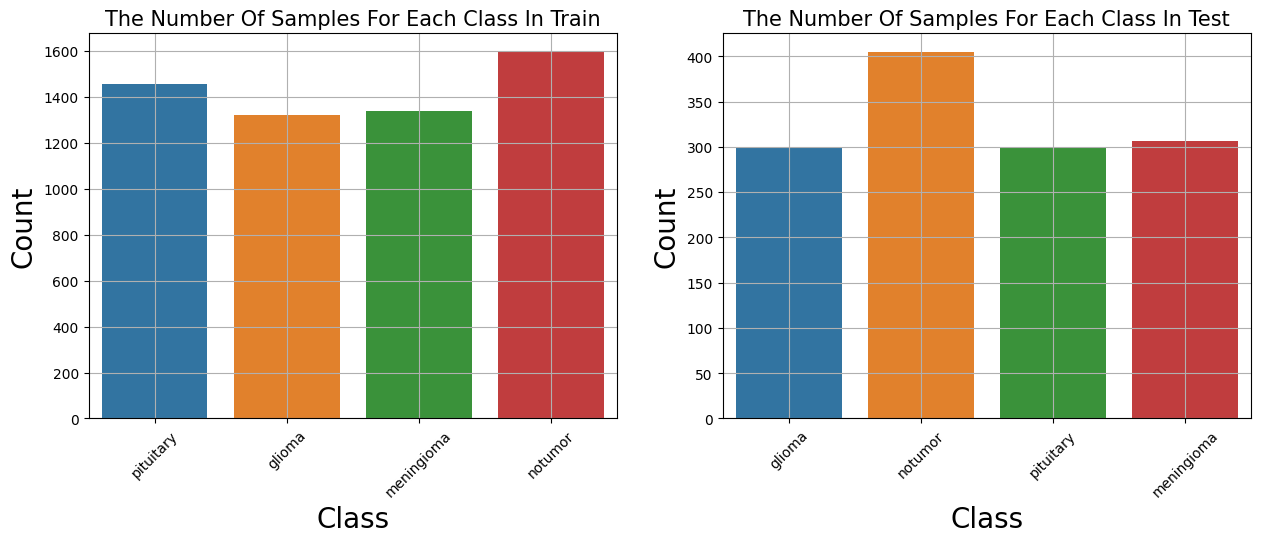

In [ ]:
# This code snippet uses the above DataFrames to generate count plots,
# visualizing the number of samples for each class in both the training and testing
# sets using the sns.countplot function from the Seaborn library.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x=train_df.label)
plt.xlabel("Class",fontsize=20)
plt.title("The Number Of Samples For Each Class In Train",fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.subplot(1,2,2)
sns.countplot(x=test_df.label)
plt.xlabel("Class",fontsize=20)
plt.title("The Number Of Samples For Each Class In Test",fontsize=15)
plt.ylabel('Count',fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Code to check any specific tumor type image
import matplotlib.image as mpimg
from ipywidgets import interact


# Get the list of tumor types
tumor_types = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]

def show_images(tumor_type):
    # Get the list of images for this tumor type
    image_files = os.listdir(os.path.join(train_dir, tumor_type))

    # Create a figure to display the images
    fig = plt.figure(figsize=(10, 10))

    # Loop over the first 5 images
    for i, image_file in enumerate(image_files[:5]):
        # Load the image
        img = mpimg.imread(os.path.join(train_dir, tumor_type, image_file))

        # Add a subplot for this image
        ax = fig.add_subplot(3, 2, i+1)
        ax.imshow(img)
        ax.axis('off')

    # Show the figure
    plt.show()

# Create an interactive widget
interact(show_images, tumor_type=tumor_types)


interactive(children=(Dropdown(description='tumor_type', options=('glioma', 'notumor', 'pituitary', 'meningiom…

<function __main__.show_images(tumor_type)>

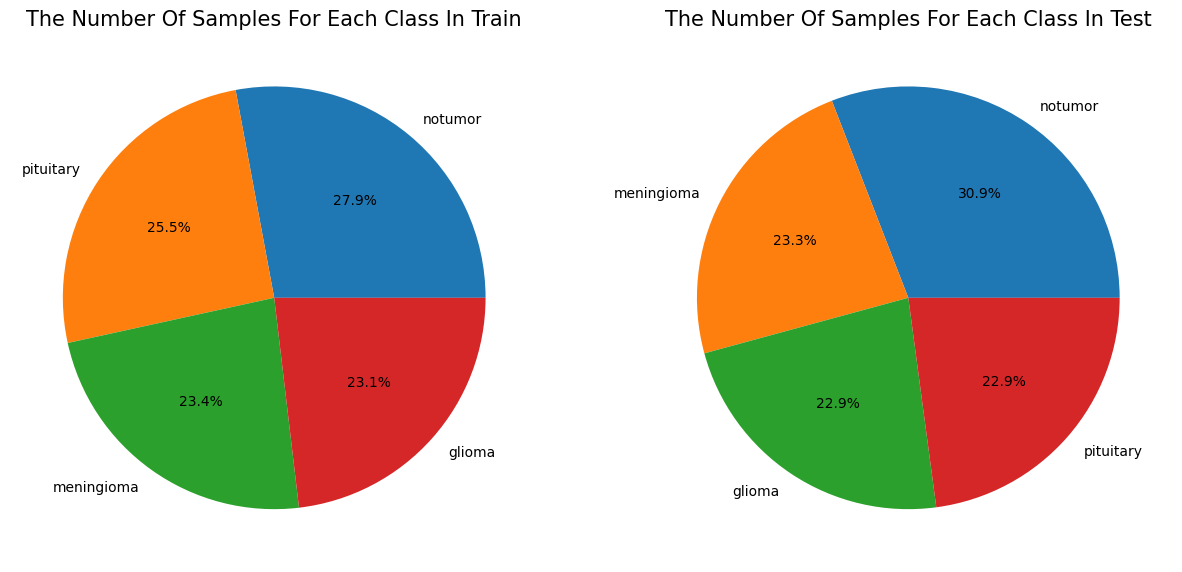

In [ ]:
#This code generates pie charts to visually represent the distribution of samples for each class in the training and testing sets
plt.figure(figsize=(15,15))
plt.subplot(1,2,1)
plt.pie(train_df.label.value_counts(),labels=train_df.label.value_counts().index,autopct ='%1.1f%%')
plt.title("The Number Of Samples For Each Class In Train",fontsize=15)
plt.subplot(1,2,2)
plt.pie(test_df.label.value_counts(),labels=test_df.label.value_counts().index,autopct ='%1.1f%%')
plt.title("The Number Of Samples For Each Class In Test",fontsize=15)
plt.show()

<ipython-input-3-3ea2dec4419a>:25: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 5000, 500)


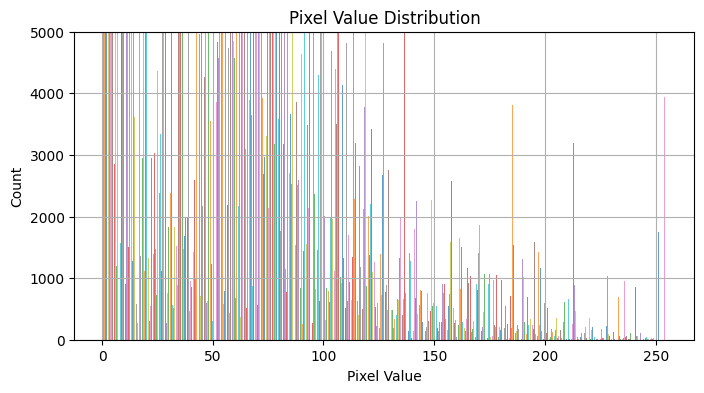

In [ ]:
# This code creates a histogram to visualize the distribution of pixel values in the image data
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
train_path = '/content/gdrive/MyDrive/BrainTumorDataset_Dup/Training'
test_path = '/content/gdrive/MyDrive/BrainTumorDataset_Dup/Testing'

train_files = {c: os.listdir(os.path.join(train_path, c)) for c in classes}
test_files = {c: os.listdir(os.path.join(test_path, c)) for c in classes}

train_imgs = []
for c in classes:
  for file in train_files[c]:
    img = imread(os.path.join(train_dir, c, file))
    train_imgs.append(img)

train_imgs = np.array(train_imgs,dtype=object)

# Create a figure with a specified size (in inches)
plt.figure(figsize=(8, 4))

# Plot a histogram of pixel values using plt.hist
plt.hist(train_imgs.reshape(-1), bins=100, alpha=0.7)

# Set the title, xlabel, and ylabel for the plot
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Count')

# Add grid lines to the plot
plt.grid(True)

# Zoom in on the y-axis by setting the y-axis limits
plt.ylim(0, 5000, 500)

# Display the plot
plt.show()


**PRE-PROCESSING**

Found 5710 images belonging to 4 classes.


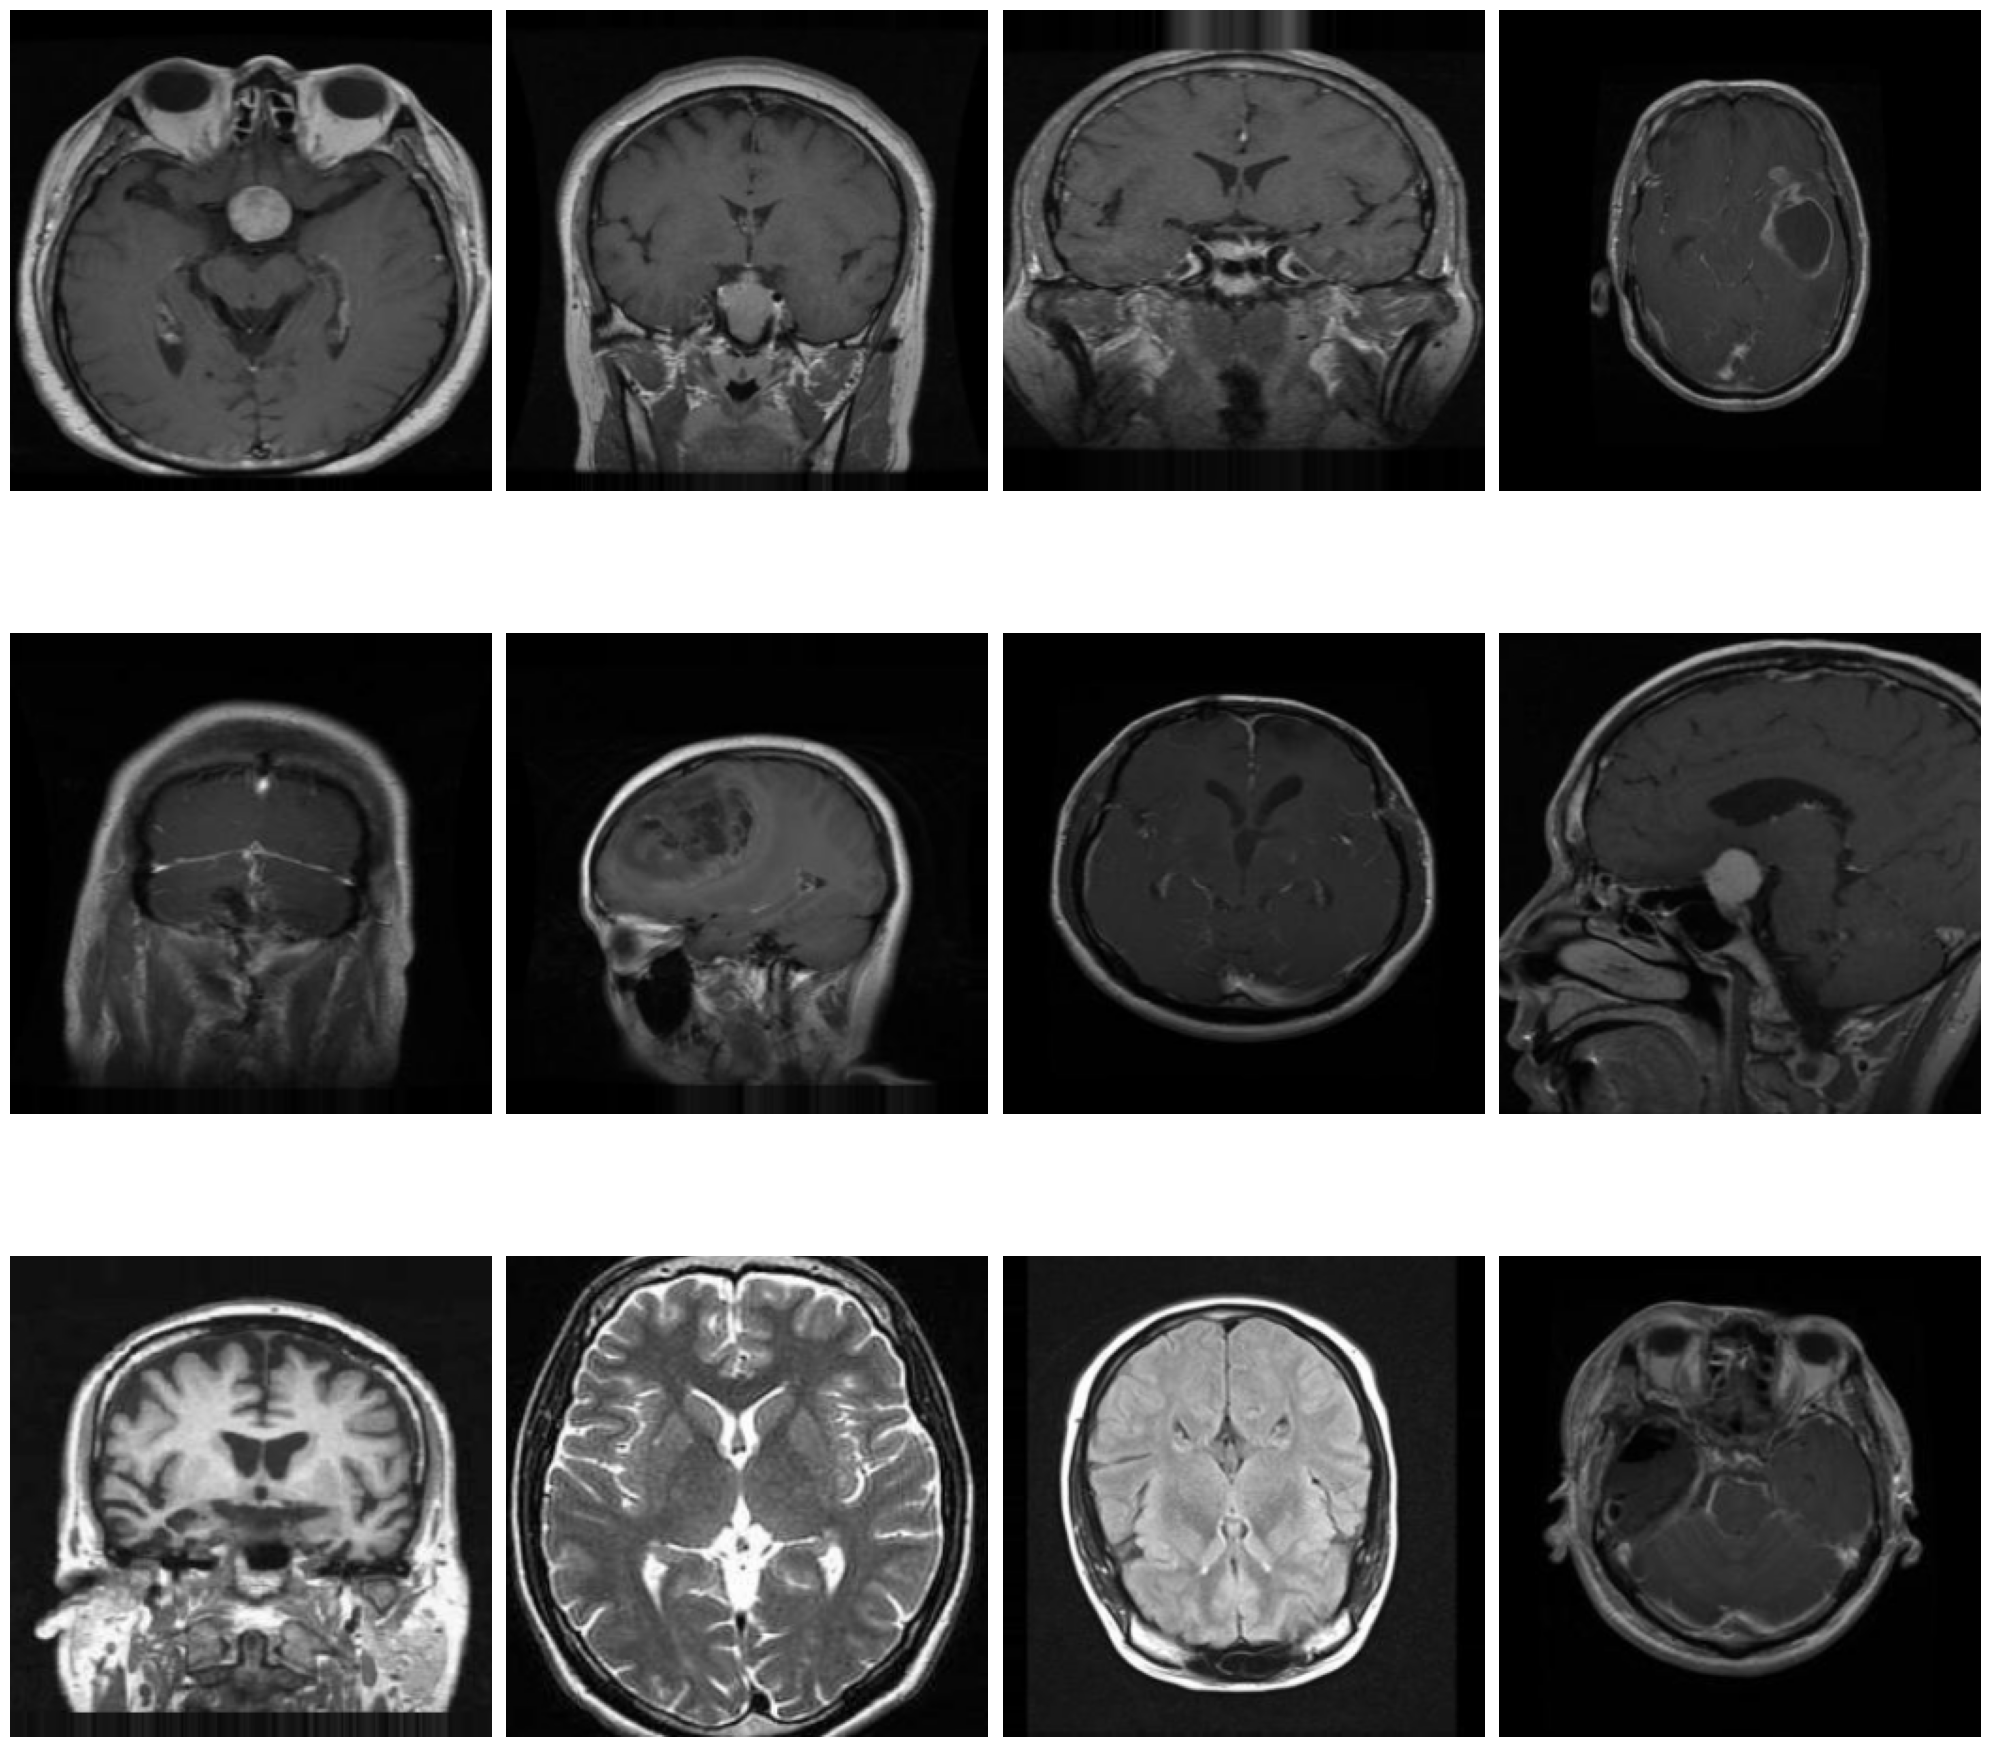

In [ ]:
# Data augmentation

# Image dimensions
img_width, img_height = 256, 256

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical')

# Get a batch of images
images, labels = next(train_generator)

# Plot the first 12 images
fig, axes = plt.subplots(3, 4, figsize=(20,20))
axes = axes.flatten()

for img, ax in zip(images, axes):
    ax.imshow(img)
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# The code uses the autoencoder to identify anomalies in brain tumor images by training on normal images
# And flagging deviations in test images during reconstruction.

# Function to load images
def load_images(directory):
  images = []
  for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
      for filename in os.listdir(subdir_path):
        if filename.endswith(".jpg"):
          image_path = os.path.join(subdir_path, filename)
          image = Image.open(image_path)
          grayscale_image = image.convert('L')
          resized_img = grayscale_image.resize((256,256), Image.BILINEAR)
          images.append(np.array(resized_img))
  return np.array(images)

# Load training set images
print("Loading training set:")
x_train = load_images(train_dir)

# Load test set images
print("Loading test set:")
x_test = load_images(test_dir)

# Normalize the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# This is the size of our encoded representations
encoding_dim = 64

# This is our input placeholder
input_img = Input(shape=(256*256,))

# Encode the input
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decode the encoded representation
decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256*256, activation='sigmoid')(decoded)

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Use the encoder to encode the test set images
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# This is our encoded (64-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

# Create the decoder model
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))
decoded_imgs = decoder.predict(encoded_imgs)

# Calculate the mean squared error between the original images and the decoded images
mse = np.mean(np.power(x_test - decoded_imgs, 2), axis=1)

# If the mse is above a certain threshold, classify the image as an anomaly
threshold = np.percentile(mse, 90)  # Adjust this value based on your dataset
anomalies = mse > threshold

# Print the number of anomalies detected
print(f"Detected {anomalies.sum()} anomalies in the test set.")

Loading training set:
Loading test set:
Epoch 1/10
23/23 [==============================] - 50s 2s/step - loss: 0.5032 - val_loss: 0.4494
Epoch 2/10
23/23 [==============================] - 45s 2s/step - loss: 0.4327 - val_loss: 0.4343
Epoch 3/10
23/23 [==============================] - 42s 2s/step - loss: 0.4220 - val_loss: 0.4270
Epoch 4/10
23/23 [==============================] - 43s 2s/step - loss: 0.4157 - val_loss: 0.4225
Epoch 5/10
23/23 [==============================] - 45s 2s/step - loss: 0.4113 - val_loss: 0.4176
Epoch 6/10
23/23 [==============================] - 41s 2s/step - loss: 0.4074 - val_loss: 0.4125
Epoch 7/10
23/23 [==============================] - 43s 2s/step - loss: 0.4034 - val_loss: 0.4084
Epoch 8/10
23/23 [==============================] - 43s 2s/step - loss: 0.3998 - val_loss: 0.4056
Epoch 9/10
23/23 [==============================] - 47s 2s/step - loss: 0.3973 - val_loss: 0.4036
Epoch 10/10
41/41 [==============================] - 1s 26ms/step
Detected 131

In [ ]:
# The autoencoder to detect anomalies in brain tumor images by training on normal images, simplifying the model,
# and classifying images with higher reconstruction errors as anomalies in both the test and training sets.

# Function to load images
def load_images(directory):
  images = []
  for subdir in os.listdir(directory):
    subdir_path = os.path.join(directory, subdir)
    if os.path.isdir(subdir_path):
      for filename in os.listdir(subdir_path):
        if filename.endswith(".jpg"):
          image_path = os.path.join(subdir_path, filename)
          image = Image.open(image_path)
          grayscale_image = image.convert('L')
          resized_img = grayscale_image.resize((128,128), Image.BILINEAR)  # Reduce image size
          images.append(np.array(resized_img))
  return np.array(images)

# Load training set images
print("Loading training set:")
x_train = load_images(train_dir)

# Load test set images
print("Loading test set:")
x_test = load_images(test_dir)

# Normalize the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# This is the size of our encoded representations
encoding_dim = 64

# This is our input placeholder
input_img = Input(shape=(128*128,))  # Adjust input shape

# Encode the input
encoded = Dense(64, activation='relu')(input_img)  # Simplify the model
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decode the encoded representation
decoded = Dense(encoding_dim, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(decoded)  # Simplify the model
decoded = Dense(128*128, activation='sigmoid')(decoded)  # Adjust output shape

# This model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder.fit(x_train, x_train, epochs=50, batch_size=128, shuffle=True, validation_data=(x_test, x_test))  # Reduce batch size

# Use the encoder to encode the test set images
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

# This is our encoded (64-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# Retrieve the last layer of the autoencoder model
decoder_layer1 = autoencoder.layers[-3]
decoder_layer2 = autoencoder.layers[-2]
decoder_layer3 = autoencoder.layers[-1]

# Create the decoder model
decoder = Model(encoded_input, decoder_layer3(decoder_layer2(decoder_layer1(encoded_input))))
decoded_imgs = decoder.predict(encoded_imgs)

# Calculate the mean squared error between the original images and the decoded images
mse = np.mean(np.power(x_test - decoded_imgs, 2), axis=1)

# If the mse is above a certain threshold, classify the image as an anomaly
threshold = np.percentile(mse, 90)  # Adjust this value based on your dataset
anomalies = mse > threshold

# Print the number of anomalies detected in the test set
print(f"Detected {anomalies.sum()} anomalies in the test set.")

# Use the encoder to encode the training set images
encoded_imgs_train = encoder.predict(x_train)

# Use the decoder to decode the encoded training images
decoded_imgs_train = decoder.predict(encoded_imgs_train)

# Calculate the mean squared error between the original images and the decoded images in the training set
mse_train = np.mean(np.power(x_train - decoded_imgs_train, 2), axis=1)

# If the mse is above a certain threshold, classify the image as an anomaly in the training set
anomalies_train = mse_train > threshold

# Print the number of anomalies detected in the training set
print(f"Detected {anomalies_train.sum()} anomalies in the training set.")

Loading training set:
Loading test set:
Epoch 1/50
45/45 [==============================] - 7s 136ms/step - loss: 0.4921 - val_loss: 0.4414
Epoch 2/50
45/45 [==============================] - 8s 183ms/step - loss: 0.4255 - val_loss: 0.4258
Epoch 3/50
45/45 [==============================] - 8s 180ms/step - loss: 0.4140 - val_loss: 0.4184
Epoch 4/50
45/45 [==============================] - 6s 129ms/step - loss: 0.4072 - val_loss: 0.4172
Epoch 5/50
45/45 [==============================] - 7s 162ms/step - loss: 0.4032 - val_loss: 0.4089
Epoch 6/50
45/45 [==============================] - 9s 193ms/step - loss: 0.3991 - val_loss: 0.4047
Epoch 7/50
45/45 [==============================] - 5s 122ms/step - loss: 0.3971 - val_loss: 0.4025
Epoch 8/50
45/45 [==============================] - 7s 153ms/step - loss: 0.3950 - val_loss: 0.4045
Epoch 9/50
45/45 [==============================] - 12s 263ms/step - loss: 0.3929 - val_loss: 0.3973
Epoch 10/50
45/45 [==============================] - 7s 140

In [ ]:
# Please don't run it again, not of any use, as this code already permanently deletes the corrupted files once and for all!
# Function to resize and save images
def resize_and_save_images(directory):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)
        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith(".jpg"):
                    image_path = os.path.join(subdir_path, filename)
                    try:
                        image = Image.open(image_path)
                        resized_img = image.resize((256,256), Image.BILINEAR)
                        # Convert RGBA and P images to RGB
                        if resized_img.mode in ['RGBA', 'P']:
                            resized_img = resized_img.convert('RGB')
                        resized_img.save(image_path)  # Save the resized image at the same location
                    except UnidentifiedImageError:
                        print(f"Cannot identify image file {image_path}. It might be corrupted or not an image.")
                        os.remove(image_path)  # Delete the corrupted image
                        print(f"Deleted the corrupted image file {image_path}")

# Resize and save training set images
resize_and_save_images(train_dir)

# Resize and save test set images
resize_and_save_images(test_dir)


#Convolutional Neural Network MODELS

#Basic CNN Model



The basic CNN code is about building and training a convolutional neural network (CNN) model for image classification. A CNN is a type of deep learning algorithm that can recognize and classify particular features from images. The code uses the Keras library to create and compile the model, and the scikit-learn library to evaluate the model's performance.

- It imports the necessary libraries and modules for the task, such as ImageDataGenerator, Conv2D, MaxPooling2D, etc.
- It defines the image dimensions, the path to the training and test data, the batch size, the number of classes, and the number of epochs for the model.
- It uses data augmentation to generate more training data from the original images by applying random transformations, such as rescaling, shearing, zooming, and flipping.
- It creates a sequential model with four layers: a convolutional layer with 32 filters and a 3x3 kernel size, a max pooling layer with a 2x2 pool size, a flatten layer to convert the output into a one-dimensional vector, and a dense layer with 64 neurons and a dropout rate of 0.5 to prevent overfitting. The output layer is another dense layer with four neurons and a softmax activation function for multi-class classification.
- It compiles the model with the Adam optimizer, the categorical crossentropy loss function, and the accuracy metric.
- It trains the model using the train generator and the test generator, which load the images from the directories and convert them into batches of tensors. It also prints the training accuracy and loss for each epoch.
- It predicts the output for the test data using the model and gets the most likely class for each image.
- It gets the ground-truth classes and the class labels from the test generator and uses them to generate a classification report, which shows the precision, recall, f1-score, and support for each class and the overall accuracy of the model.
- It also prints and plots the confusion matrix, which shows the number of true positives, false positives, false negatives, and true negatives for each class.
- It computes and plots the ROC curve and the ROC area for each class, which show the trade-off between the true positive rate and the false positive rate for different thresholds of the model.

The code is a good example of how to use a CNN model for image classification, but it can be improved by using training for more epochs, as we trained it for 10 epochs, and we achieved promising test accuracy of 81% as you can see in the confusion matrix.

**CNN MODEL 1**

Found 5710 images belonging to 4 classes.


<ipython-input-6-6f15bc7e5c5d>:41: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
356/356 [==============================] - 1140s 3s/step - loss: 0.9477 - accuracy: 0.5847
Epoch 2/10
356/356 [==============================] - 657s 2s/step - loss: 0.7501 - accuracy: 0.6807
Epoch 3/10
356/356 [==============================] - 657s 2s/step - loss: 0.6529 - accuracy: 0.7237
Epoch 4/10
356/356 [==============================] - 657s 2s/step - loss: 0.6107 - accuracy: 0.7473
Epoch 5/10
356/356 [==============================] - 650s 2s/step - loss: 0.5590 - accuracy: 0.7627
Epoch 6/10
356/356 [==============================] - 652s 2s/step - loss: 0.5274 - accuracy: 0.7857
Epoch 7/10
356/356 [==============================] - 642s 2s/step - loss: 0.5070 - accuracy: 0.7917
Epoch 8/10
356/356 [==============================] - 646s 2s/step - loss: 0.4797 - accuracy: 0.8037
Epoch 9/10
356/356 [==============================] - 636s 2s/step - loss: 0.4698 - accuracy: 0.8096
Epoch 10/10
356/356 [==============================] - 635s 2s/step - loss: 0.4526 - accur

<ipython-input-6-6f15bc7e5c5d>:58: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


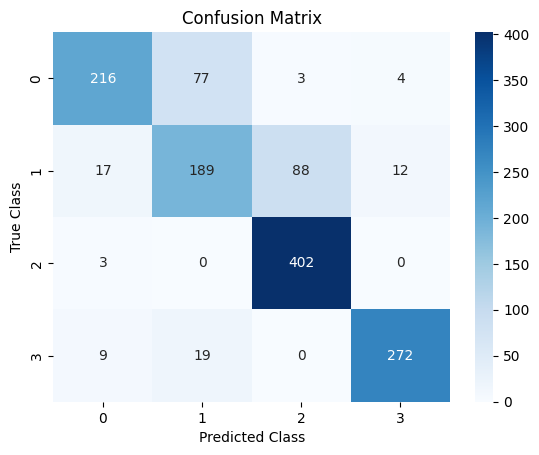

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 123008)            0         
                                                                 
 dense_1 (Dense)             (None, 64)               

In [ ]:
# Basic CNN Model 1:This Python code defines and trains a convolutional neural network (CNN) for image classification using Keras.
#It includes data augmentation for training, a defined CNN architecture,
# model compilation, training, testing data preparation, prediction, and visualization of a confusion matrix using a heatmap. The model is summarized at the end.

# Image dimensions
img_width, img_height = 256, 256

# Hyperparameters
batch_size = 16
num_classes = 4
epochs = 10

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the model
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs)

# Data preparation for test data
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Predict the output
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Heatmap visualization
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

# Model summary
model.summary()



**CNN MODEL 2**

Found 5712 images belonging to 4 classes.


<ipython-input-3-d621723fe898>:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


Epoch 1/10
178/178 [==============================] - 806s 4s/step - loss: 1.0217 - accuracy: 0.5762
Epoch 2/10
178/178 [==============================] - 737s 4s/step - loss: 0.7215 - accuracy: 0.6981
Epoch 3/10
178/178 [==============================] - 739s 4s/step - loss: 0.6258 - accuracy: 0.7468
Epoch 4/10
178/178 [==============================] - 726s 4s/step - loss: 0.5675 - accuracy: 0.7736
Epoch 5/10
178/178 [==============================] - 726s 4s/step - loss: 0.5387 - accuracy: 0.7861
Epoch 6/10
178/178 [==============================] - 730s 4s/step - loss: 0.5114 - accuracy: 0.7986
Epoch 7/10
178/178 [==============================] - 732s 4s/step - loss: 0.4884 - accuracy: 0.8055
Epoch 8/10
178/178 [==============================] - 746s 4s/step - loss: 0.4748 - accuracy: 0.8157
Epoch 9/10
178/178 [==============================] - 715s 4s/step - loss: 0.4468 - accuracy: 0.8278
Epoch 10/10
178/178 [==============================] - 716s 4s/step - loss: 0.4338 - accura

<ipython-input-3-d621723fe898>:73: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


              precision    recall  f1-score   support

      glioma       0.91      0.64      0.75       300
  meningioma       0.63      0.63      0.63       306
     notumor       0.83      0.99      0.90       405
   pituitary       0.91      0.94      0.92       300

    accuracy                           0.81      1311
   macro avg       0.82      0.80      0.80      1311
weighted avg       0.82      0.81      0.81      1311

[[192  97   2   9]
 [ 14 192  81  19]
 [  3   1 401   0]
 [  2  17   0 281]]


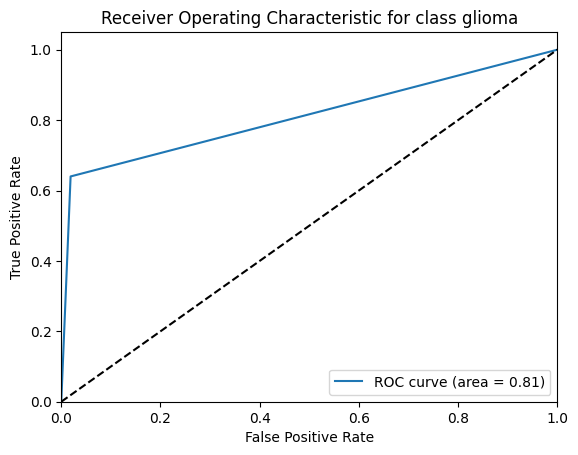

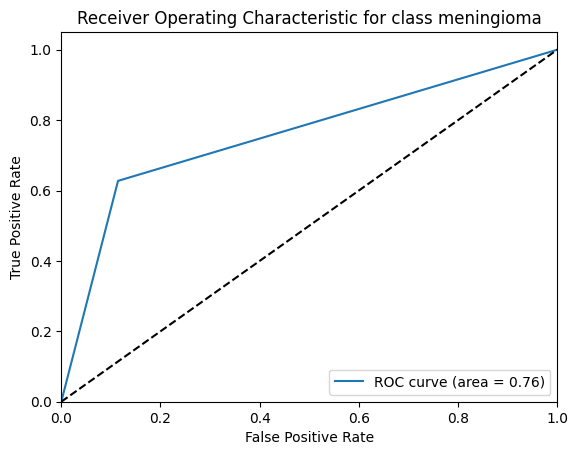

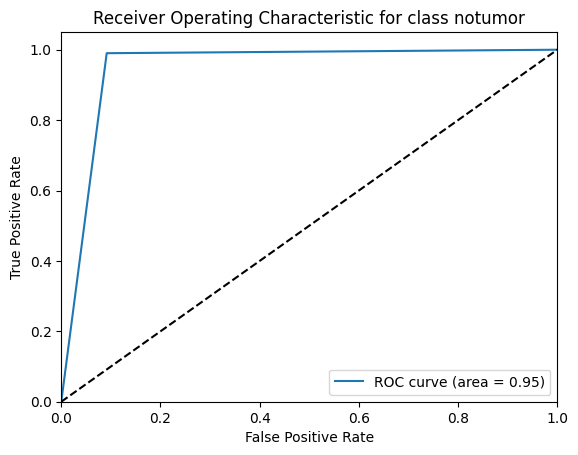

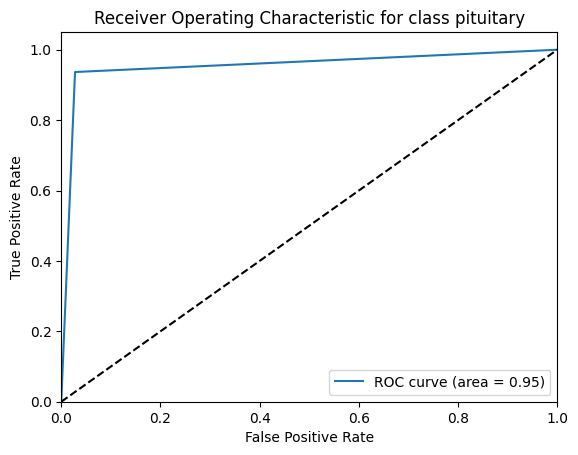

In [ ]:
#CNN MODEL 2:This Python code uses Keras to define and train a convolutional neural network (CNN) for image classification.
#It includes data augmentation for training, a CNN architecture, model compilation, training, and testing data preparation.
#After making predictions, it calculates and prints a classification report, confusion matrix, and plots Receiver Operating Characteristic (ROC) curves for each class in the dataset.
#The code utilizes scikit-learn for generating statistics and evaluating the model's performance on a multi-class classification task.

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Image dimensions
img_width, img_height = 256, 256

# Path to your training data
train_data_dir = '/content/gdrive/MyDrive/BrainTumorDataset_Dup/Training'
# Path to your test data
test_data_dir = '/content/gdrive/MyDrive/BrainTumorDataset_Dup/Testing'

# Hyperparameters
batch_size = 32
num_classes = 4
epochs = 10

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

# Model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the model
model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs)

# Data preparation for test data
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)

# Predict the output
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)

# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

# Get ground-truth classes and class-labels
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Use scikit-learn to get statistics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
lb = LabelBinarizer()
y_test = lb.fit_transform(true_classes)
y_pred = lb.transform(predicted_classes)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
for i in range(num_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for class {}'.format(class_labels[i]))
    plt.legend(loc="lower right")
    plt.show()


**Transfer Learning** **Model 1**

Found 5710 images belonging to 4 classes.


<ipython-input-4-f202234c5525>:45: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)


Epoch 1/10
178/178 [==============================] - 124s 663ms/step - loss: 0.3850 - accuracy: 0.8610
Epoch 2/10
178/178 [==============================] - 115s 648ms/step - loss: 0.2248 - accuracy: 0.9195
Epoch 3/10
178/178 [==============================] - 116s 651ms/step - loss: 0.1288 - accuracy: 0.9569
Epoch 4/10
178/178 [==============================] - 118s 660ms/step - loss: 0.1106 - accuracy: 0.9602
Epoch 5/10
178/178 [==============================] - 116s 650ms/step - loss: 0.0813 - accuracy: 0.9711
Epoch 6/10
178/178 [==============================] - 114s 642ms/step - loss: 0.0721 - accuracy: 0.9736
Epoch 7/10
178/178 [==============================] - 116s 650ms/step - loss: 0.0621 - accuracy: 0.9780
Epoch 8/10
178/178 [==============================] - 118s 660ms/step - loss: 0.0501 - accuracy: 0.9840
Epoch 9/10
178/178 [==============================] - 114s 640ms/step - loss: 0.0434 - accuracy: 0.9849
Epoch 10/10
178/178 [==============================] - 115s 648m

<ipython-input-4-f202234c5525>:59: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


[[287  13   0   0]
 [ 41 258   4   3]
 [ 11   0 394   0]
 [  9   4   3 284]]


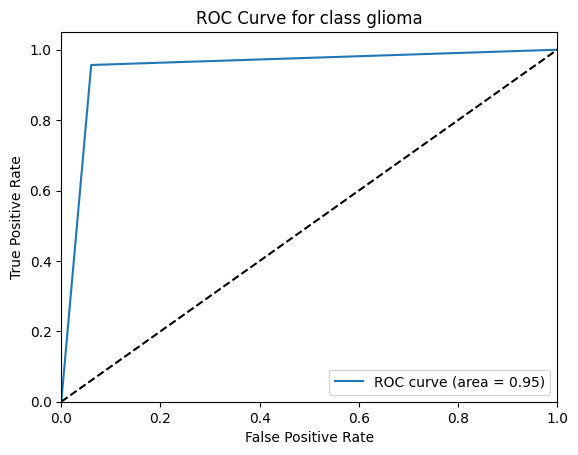

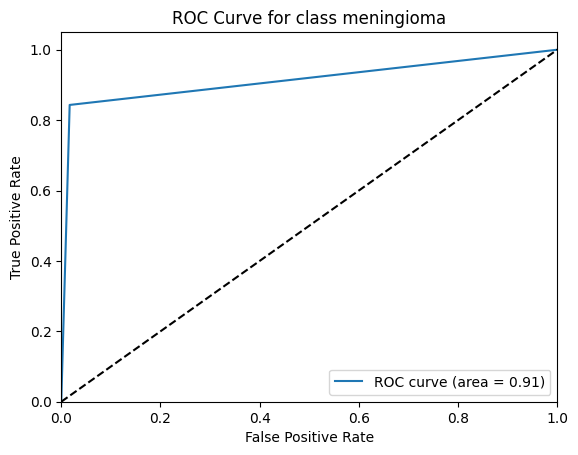

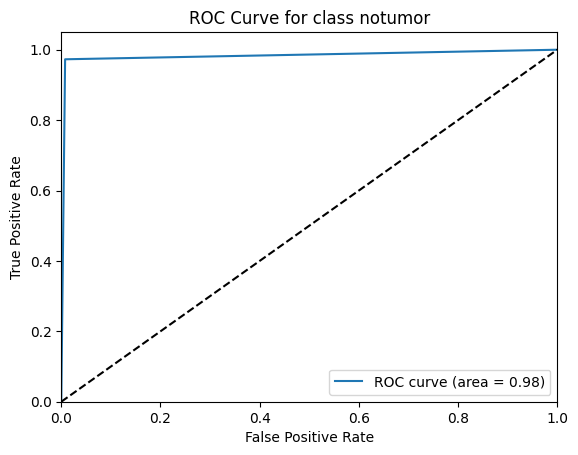

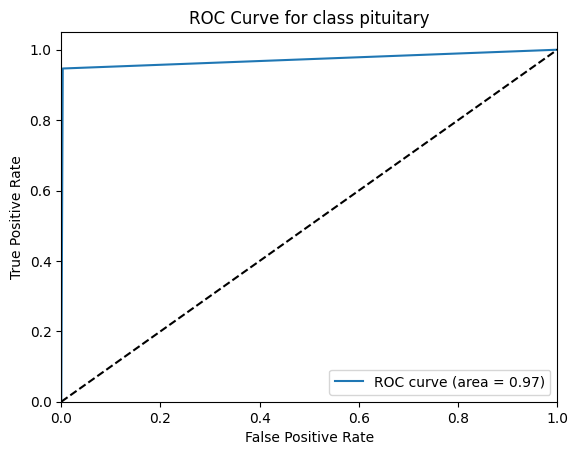

In [ ]:
# This Python code utilizes a pre-trained MobileNetV2 model for image classification on brain tumor data.
#It employs transfer learning by freezing the pre-trained layers and adding custom layers for the specific classification task.
#The script includes data augmentation for training, model compilation, training, and evaluation using scikit-learn metrics such as classification report and confusion matrix.
#Additionally, it calculates and plots Receiver Operating Characteristic (ROC) curves for each class, providing insights into model performance across different thresholds.

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
img_width, img_height = 128, 128  # reduced image size for faster processing
batch_size = 32
num_classes = 4
epochs = 10

# Set up data directories
train_dir = "/content/gdrive/MyDrive/BrainTumorDataset_New/Training"
test_dir = "/content/gdrive/MyDrive/BrainTumorDataset_New/Testing"

# Load MobileNetV2 with pre-trained weights and freeze layers
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add global average pooling and dense layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)

# Output layer with softmax activation for multi-class classification
predictions = Dense(num_classes, activation="softmax")(x)

# Define and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode="categorical"
)

# Train the model with reduced epochs due to faster model
model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)

# Prepare test data
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

# Predict and get results
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Evaluate using scikit-learn metrics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Calculate and plot ROC curves
fpr, tpr, roc_auc = {}, {}, {}
lb = LabelBinarizer()
y_test = lb.fit_transform(true_classes)
y_pred = lb.transform(predicted_classes)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f"ROC curve (area = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for class {class_labels[i]}")
    plt.legend(loc="lower right")


**Transfer Learning Model 2**

Found 5709 images belonging to 4 classes.


<ipython-input-10-4db3ad8e8d74>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)


Epoch 1/10
89/89 [==============================] - 114s 1s/step - loss: 0.6793 - accuracy: 0.7642
Epoch 2/10
89/89 [==============================] - 106s 1s/step - loss: 0.4225 - accuracy: 0.8645
Epoch 3/10
89/89 [==============================] - 125s 1s/step - loss: 0.3607 - accuracy: 0.8817
Epoch 4/10
89/89 [==============================] - 107s 1s/step - loss: 0.3318 - accuracy: 0.8891
Epoch 5/10
89/89 [==============================] - 107s 1s/step - loss: 0.3043 - accuracy: 0.9001
Epoch 6/10
89/89 [==============================] - 107s 1s/step - loss: 0.2869 - accuracy: 0.9008
Epoch 7/10
89/89 [==============================] - 110s 1s/step - loss: 0.2727 - accuracy: 0.9093
Epoch 8/10
89/89 [==============================] - 107s 1s/step - loss: 0.2604 - accuracy: 0.9112
Epoch 9/10
89/89 [==============================] - 107s 1s/step - loss: 0.2473 - accuracy: 0.9174
Epoch 10/10
89/89 [==============================] - 107s 1s/step - loss: 0.2408 - accuracy: 0.9208
Found 131

<ipython-input-10-4db3ad8e8d74>:49: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


              precision    recall  f1-score   support

      glioma       0.90      0.86      0.88       300
  meningioma       0.83      0.75      0.79       306
     notumor       0.92      0.95      0.94       405
   pituitary       0.89      0.97      0.93       300

    accuracy                           0.89      1311
   macro avg       0.89      0.88      0.88      1311
weighted avg       0.89      0.89      0.89      1311

[[259  37   1   3]
 [ 18 230  30  28]
 [  9   5 386   5]
 [  1   6   2 291]]


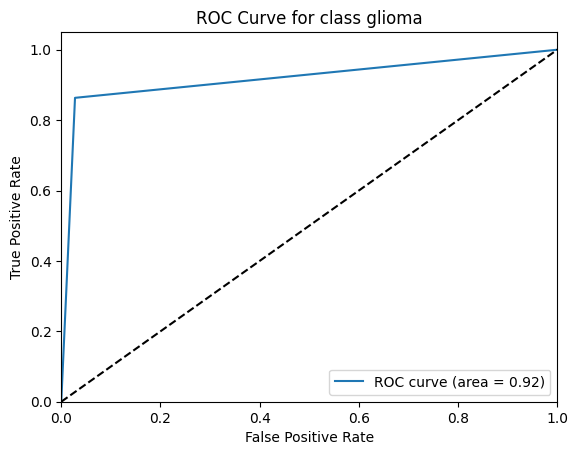

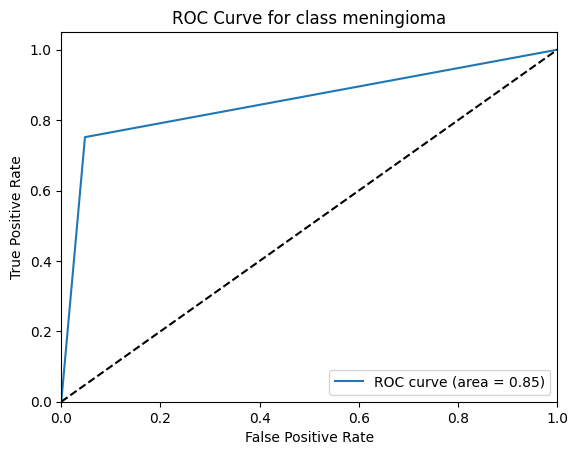

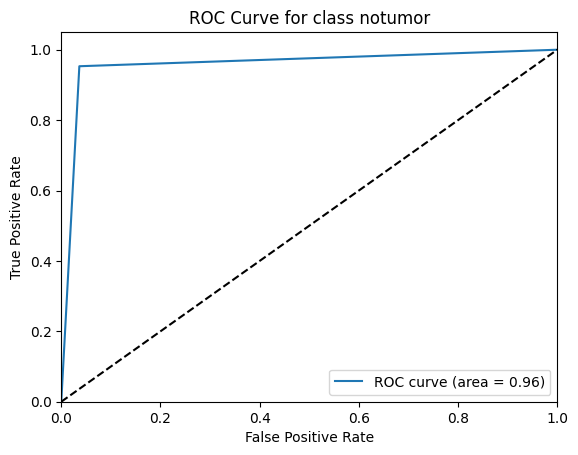

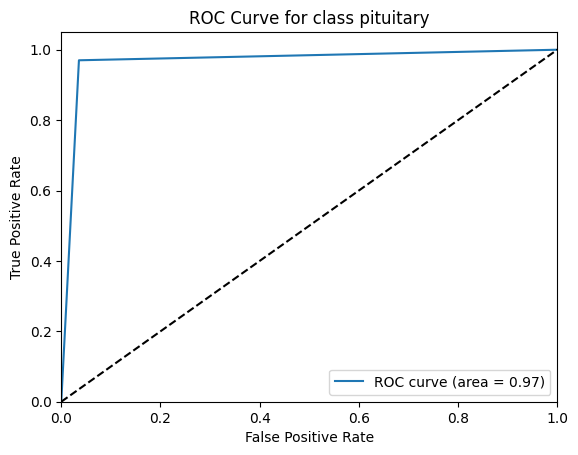

In [ ]:
# This Python code uses a pre-trained MobileNetV2 model with frozen layers for image classification on brain tumor data.
#It employs transfer learning, adds custom dense layers for classification, and utilizes Stochastic Gradient Descent (SGD) as the optimization algorithm.
#The script includes data augmentation, model compilation, training, and evaluation with metrics such as classification report, confusion matrix, and ROC curves.

img_width, img_height = 256, 256
batch_size = 64
num_classes = 4
epochs = 10

# Set up data directories
train_dir = "/content/gdrive/MyDrive/BrainTumorDataset_New/Training"
test_dir = "/content/gdrive/MyDrive/BrainTumorDataset_New/Testing"

# Load MobileNetV2 with pre-trained weights and freeze layers
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add global average pooling and dense layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)

# Output layer with softmax activation for multi-class classification
predictions = Dense(num_classes, activation="softmax")(x)

# Define and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode="categorical"
)

# Train the model with reduced epochs due to faster model
model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)

# Prepare test data
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

# Predict and get results
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Use scikit-learn to get statistics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Evaluate using scikit-learn metrics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Calculate and plot ROC curves
fpr, tpr, roc_auc = {}, {}, {}
lb = LabelBinarizer()
y_test = lb.fit_transform(true_classes)
y_pred = lb.transform(predicted_classes)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f"ROC curve (area = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for class {class_labels[i]}")
    plt.legend(loc="lower right")


**Transfer Learning Model 3**

Found 5709 images belonging to 4 classes.


<ipython-input-13-985088f52249>:35: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)


Epoch 1/10
178/178 [==============================] - 44s 208ms/step - loss: 3.4451 - accuracy: 0.8212
Epoch 2/10
178/178 [==============================] - 39s 217ms/step - loss: 0.9738 - accuracy: 0.8617
Epoch 3/10
178/178 [==============================] - 37s 210ms/step - loss: 0.6968 - accuracy: 0.8635
Epoch 4/10
178/178 [==============================] - 38s 214ms/step - loss: 0.6020 - accuracy: 0.8647
Epoch 5/10
178/178 [==============================] - 39s 218ms/step - loss: 0.5529 - accuracy: 0.8778
Epoch 6/10
178/178 [==============================] - 38s 211ms/step - loss: 0.5526 - accuracy: 0.8679
Epoch 7/10
178/178 [==============================] - 37s 209ms/step - loss: 0.5419 - accuracy: 0.8674
Epoch 8/10
178/178 [==============================] - 38s 216ms/step - loss: 0.5074 - accuracy: 0.8785
Epoch 9/10
178/178 [==============================] - 38s 212ms/step - loss: 0.4876 - accuracy: 0.8818
Epoch 10/10
178/178 [==============================] - 37s 209ms/step - l

<ipython-input-13-985088f52249>:49: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


              precision    recall  f1-score   support

      glioma       0.87      0.86      0.87       300
  meningioma       0.80      0.77      0.79       306
     notumor       0.93      0.95      0.94       405
   pituitary       0.92      0.94      0.93       300

    accuracy                           0.88      1311
   macro avg       0.88      0.88      0.88      1311
weighted avg       0.88      0.88      0.88      1311

[[257  41   1   1]
 [ 23 236  27  20]
 [  8   7 385   5]
 [  6  10   2 282]]


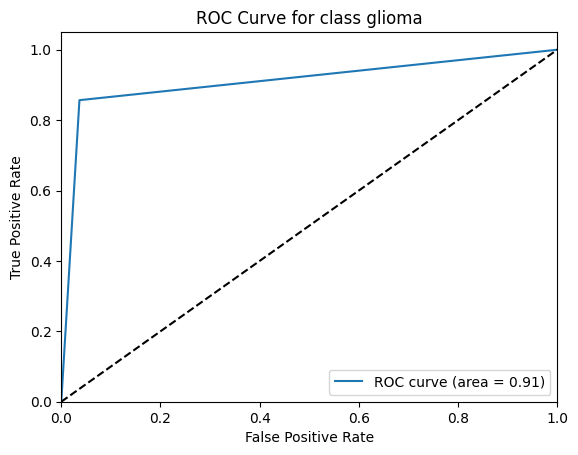

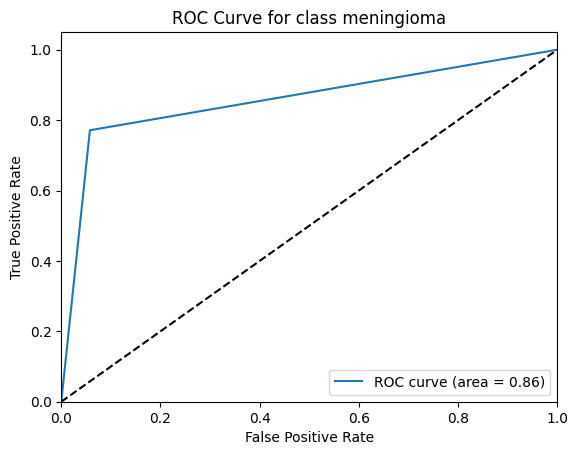

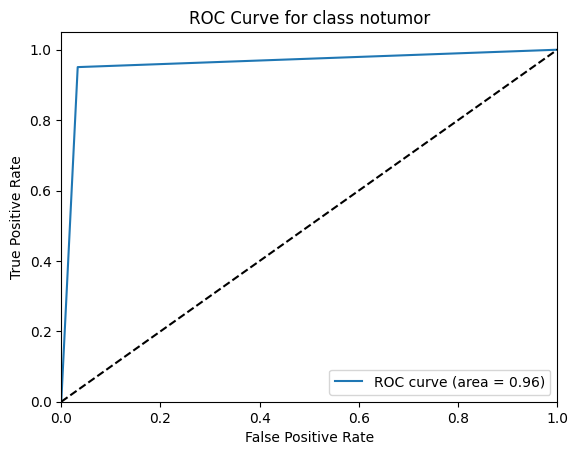

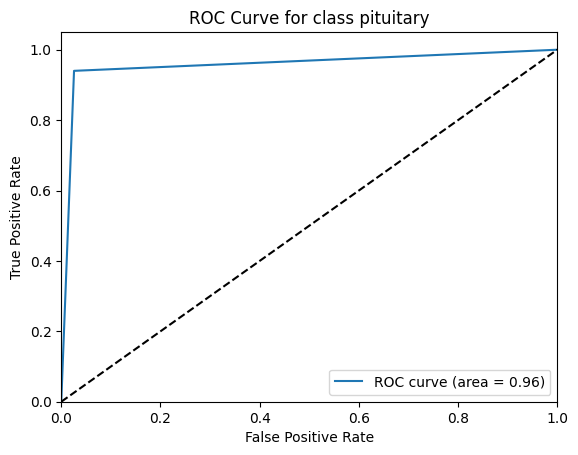

In [ ]:
# This Python code enhances the previous example by introducing L2 regularization and dropout to the dense layers of the MobileNetV2-based model.
#L2 regularization helps prevent overfitting, and dropout introduces random dropout of units during training.
#The script continues to use Adam as the optimizer, data augmentation for training,
#and evaluates the model's performance using classification report, confusion matrix, and ROC curves.


img_width, img_height = 128, 128
batch_size = 32
num_classes = 4
epochs = 10


# Load MobileNetV2 with pre-trained weights and freeze layers
base_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(img_width, img_height, 3))
for layer in base_model.layers:
    layer.trainable = False

# Add global average pooling and dense layers with L2 regularization
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu", kernel_regularizer=l2(0.01))(x)  # L2 regularization
x = Dropout(0.5)(x)  # Dropout

# Output layer with softmax activation for multi-class classification
predictions = Dense(num_classes, activation="softmax")(x)

# Define and compile the model
model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode="categorical"
)

# Train the model with reduced epochs due to faster model
model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)

# Prepare test data
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

# Predict and get results
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Use scikit-learn to get statistics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Evaluate using scikit-learn metrics
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Calculate and plot ROC curves
fpr, tpr, roc_auc = {}, {}, {}
lb = LabelBinarizer()
y_test = lb.fit_transform(true_classes)
y_pred = lb.transform(predicted_classes)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f"ROC curve (area = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for class {class_labels[i]}")
    plt.legend(loc="lower right")


**Ensemble models!**


Found 5709 images belonging to 4 classes.


<ipython-input-3-efa0f4f17629>:54: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)


Epoch 1/6
178/178 [==============================] - 2184s 12s/step - loss: 0.5188 - accuracy: 0.8388
Epoch 2/6
178/178 [==============================] - 2156s 12s/step - loss: 0.2233 - accuracy: 0.9216
Epoch 3/6
178/178 [==============================] - 2145s 12s/step - loss: 0.1608 - accuracy: 0.9412
Epoch 4/6
178/178 [==============================] - 2155s 12s/step - loss: 0.1138 - accuracy: 0.9604
Epoch 5/6
178/178 [==============================] - 2135s 12s/step - loss: 0.0789 - accuracy: 0.9725
Epoch 6/6
178/178 [==============================] - 2132s 12s/step - loss: 0.0621 - accuracy: 0.9780
Found 1311 images belonging to 4 classes.


<ipython-input-3-efa0f4f17629>:68: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 254, 254, 32)         896       ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)         0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 125, 125, 32)         9248      ['max_pooling2d[0][0]']   

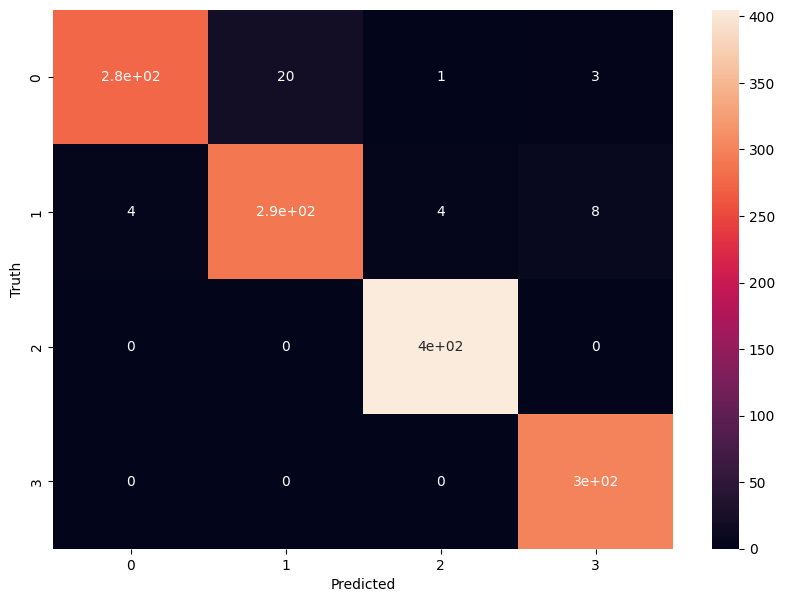

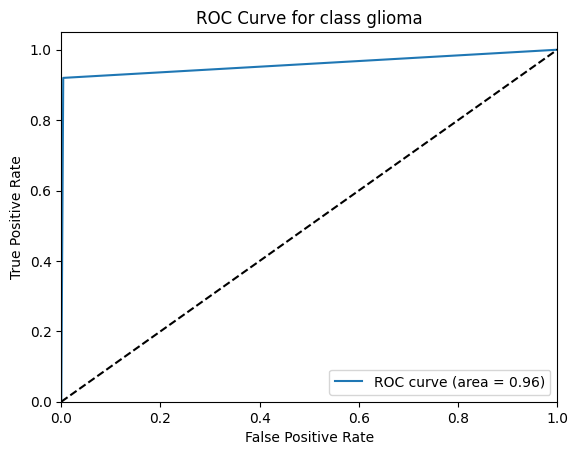

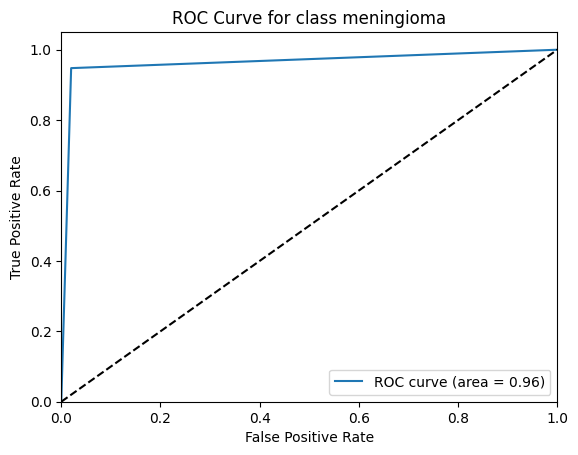

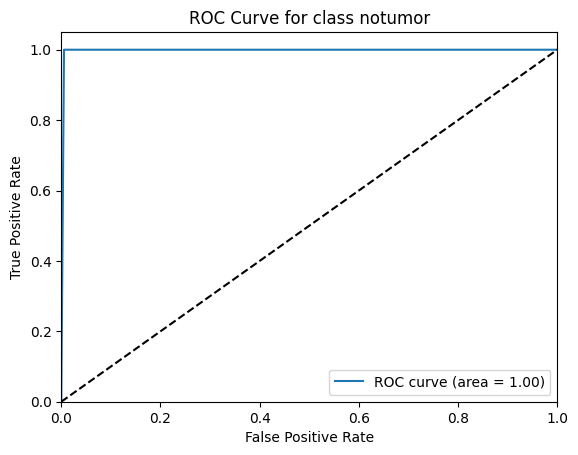

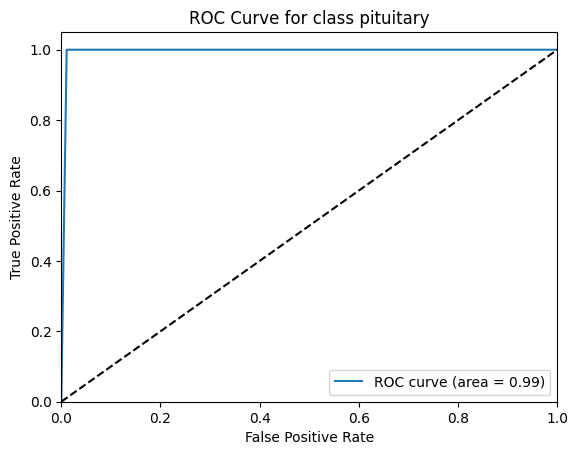

In [ ]:
# Ensemble model combining MobileNetV2, DenseNet121, and a custom CNN for multi-class image classification,
# trained with data augmentation, and evaluated using a classification report, confusion matrix, and ROC curves.


# Define parameters
img_width, img_height = 256, 256
batch_size = 32
num_classes = 4
epochs = 6

# Define input shape
input_shape = (img_width, img_height, 3)
inputs = Input(input_shape)

# Load old MobileNetV2 model
mobilenet_model = MobileNetV2(weights="imagenet", include_top=False, input_shape=input_shape)
for layer in mobilenet_model.layers:
    layer.trainable = False
mobilenet = mobilenet_model(inputs)
mobilenet = GlobalAveragePooling2D()(mobilenet)

# Load New DenseNet121 model
densenet_model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)
for layer in densenet_model.layers:
    layer.trainable = False
densenet = densenet_model(inputs)
densenet = GlobalAveragePooling2D()(densenet)

# Define the old CNN model used earlier
cnn = Conv2D(32, (3, 3), activation='relu')(inputs)
cnn = MaxPooling2D(pool_size=(2, 2))(cnn)
cnn = Conv2D(32, (3, 3), activation='relu')(cnn)
cnn = MaxPooling2D(pool_size=(2, 2))(cnn)
cnn = Flatten()(cnn)
cnn = Dense(64, activation='relu')(cnn)
cnn = Dropout(0.5)(cnn)

# Concatenate all three models' outputs
concat = concatenate([mobilenet, densenet, cnn])

# Add a dense layer and the output layer
dense = Dense(1024, activation="relu")(concat)
outputs = Dense(num_classes, activation="softmax")(dense)

# Define the ensemble model and compile it
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

# Data augmentation for training
train_datagen = ImageDataGenerator(rescale=1. / 255, shear_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(img_width, img_height), batch_size=batch_size, class_mode="categorical"
)

# Train the model
model.fit_generator(train_generator, steps_per_epoch=train_generator.samples // batch_size, epochs=epochs)

# Prepare test data
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

# Predict and get results
test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)
predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Print model summary
model.summary()

# Print classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

# Print confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
print(cm)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Calculate and plot ROC curves
fpr, tpr, roc_auc = {}, {}, {}
lb = LabelBinarizer()
y_test = lb.fit_transform(true_classes)
y_pred = lb.transform(predicted_classes)
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.figure()
    plt.plot(fpr[i], tpr[i], label=f"ROC curve (area = {roc_auc[i]:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlim(0.0, 1.0)
    plt.ylim(0.0, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for class {class_labels[i]}")
    plt.legend(loc="lower right")
